# KNN Classification Algorithm

# BUSINESS PROBLEM UNDERSDTANDING

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('gene_expresssion.csv')
df.head()

,Gene1,Gene2,CancerPresent
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


# Data Understanding

In [9]:
#Test_Result 0 If No Pass or 1 if Pass

In [12]:
df.shape

(3000, 3)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gene1          3000 non-null   float64
 1   Gene2          3000 non-null   float64
 2   CancerPresent  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


# Exploratory Data Analysis

<AxesSubplot:xlabel='Gene1', ylabel='Gene2'>

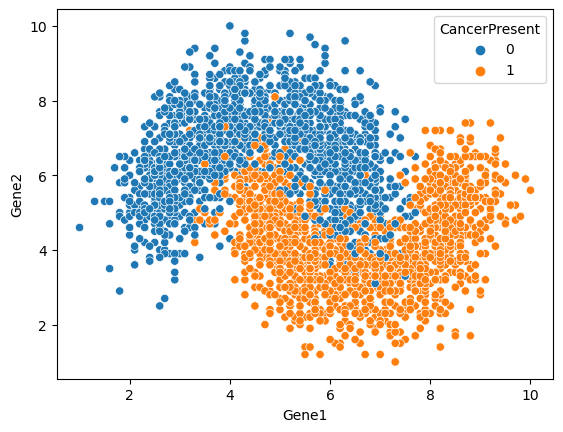

In [17]:
sns.scatterplot(x='Gene1',y='Gene2',hue='CancerPresent',data=df)

# X&y

In [20]:
X=df.drop('CancerPresent',axis=1)
y=df['CancerPresent']

# Train|Test Split

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Scaling Data

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Modelling

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

# Prediction

In [26]:
#Prediction on your train data
y_pred_train=knn_model.predict(X_train)
#Prediction on your test data
y_pred_test=knn_model.predict(X_test)

# EVALUATION

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_pred_train)) #TRAIN ACCURACY
print(accuracy_score(y_test,y_pred_test)) #TEST ACCURACY

0.9428571428571428
0.9277777777777778


# Cross Validation

In [30]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(knn_model,X,y,cv=5)
print(scores)

scores.mean()

[0.91333333 0.93       0.92833333 0.93       0.93166667]


0.9266666666666665

# Choosing best K value

# Hyperparameter Tuning for KNN Classifier

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
estimator = KNeighborsClassifier()

param_grid={'n_neighbors':list(range(1,31)),'p':[1,2]}

full_cv_classifier=GridSearchCV(estimator, param_grid, cv=5,scoring='accuracy')

In [45]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'p': [1, 2]},
             scoring='accuracy')

In [47]:
full_cv_classifier.best_params_

{'n_neighbors': 20, 'p': 2}

# Rebult KNN model with best hyper Parameters

In [50]:
knn_model=KNeighborsClassifier(n_neighbors=20,p=2)
knn_model.fit(X_train,y_train)

#Prediction on your train data
y_pred_train=knn_model.predict(X_train)
#Prediction on your test data
y_pred_test=knn_model.predict(X_test)

print(accuracy_score(y_train,y_pred_train)) #TRAIN ACCURACY
print(accuracy_score(y_test,y_pred_test)) #TEST ACCURACY

0.9338095238095238
0.9466666666666667


In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_test)

array([[451,  19],
       [ 29, 401]], dtype=int64)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900

